# Plot Figure 6A

In [1]:
import scanpy as sc
import scvelo as scv
import numpy as np
import pandas as pd

In [2]:
scv.settings.vector_friendly = False
scv.set_figure_params( dpi=300, dpi_save = 300, frameon=False, figsize = (7,5), format='png',fontsize=30)

In [3]:
adata = sc.read('adata_human_for_velocity.h5')
adata_store = adata.copy()

Velocities with all genes

In [4]:
# Preprocessing

In [5]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata,n_neighbors=80)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:47) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:13) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [ ]:
# Compute velocities

In [ ]:
scv.tl.recover_dynamics(adata) # This function is very computationally expensive so we run it in the background

In [6]:
adata = scv.read('adata_vel_human_with_MURK.h5')

In [7]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:24) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:08:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:13) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo__wrong_vel_human.png


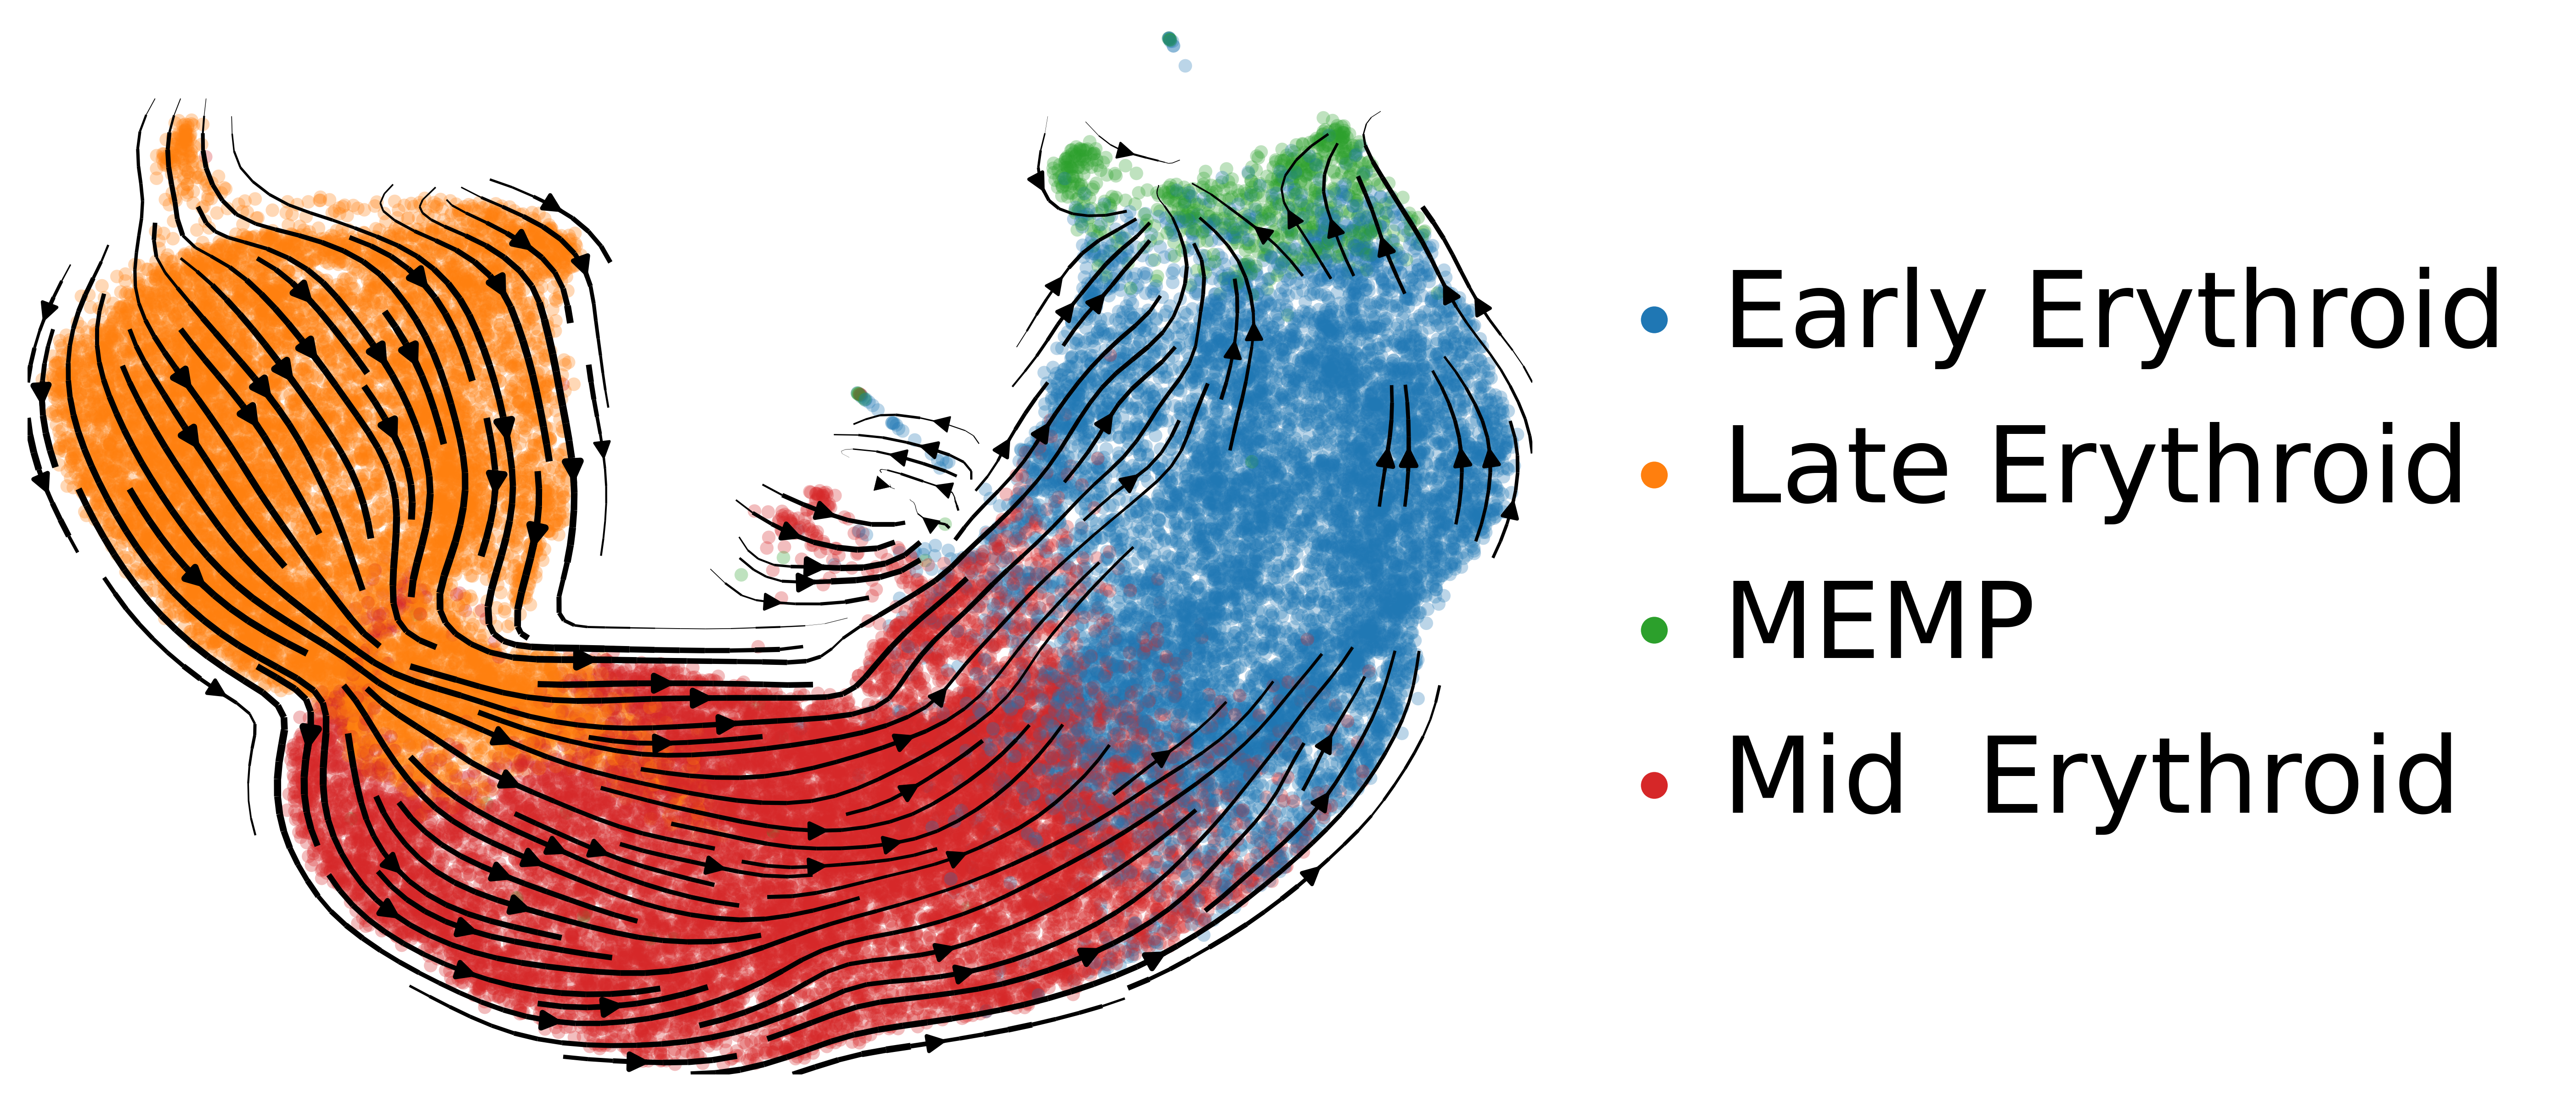

In [8]:
# Plot Figure 6A top left corner
adata.obs['type2'] = adata_store.obs['type2']
scv.pl.velocity_embedding_stream(adata, basis = "umap", color ="type2", size = 50,save = '_wrong_vel_human.png',legend_loc='right margin',title ='')

computing latent time using root_cells as prior
    finished (0:00:22) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo__wrong_latent_time_human.png


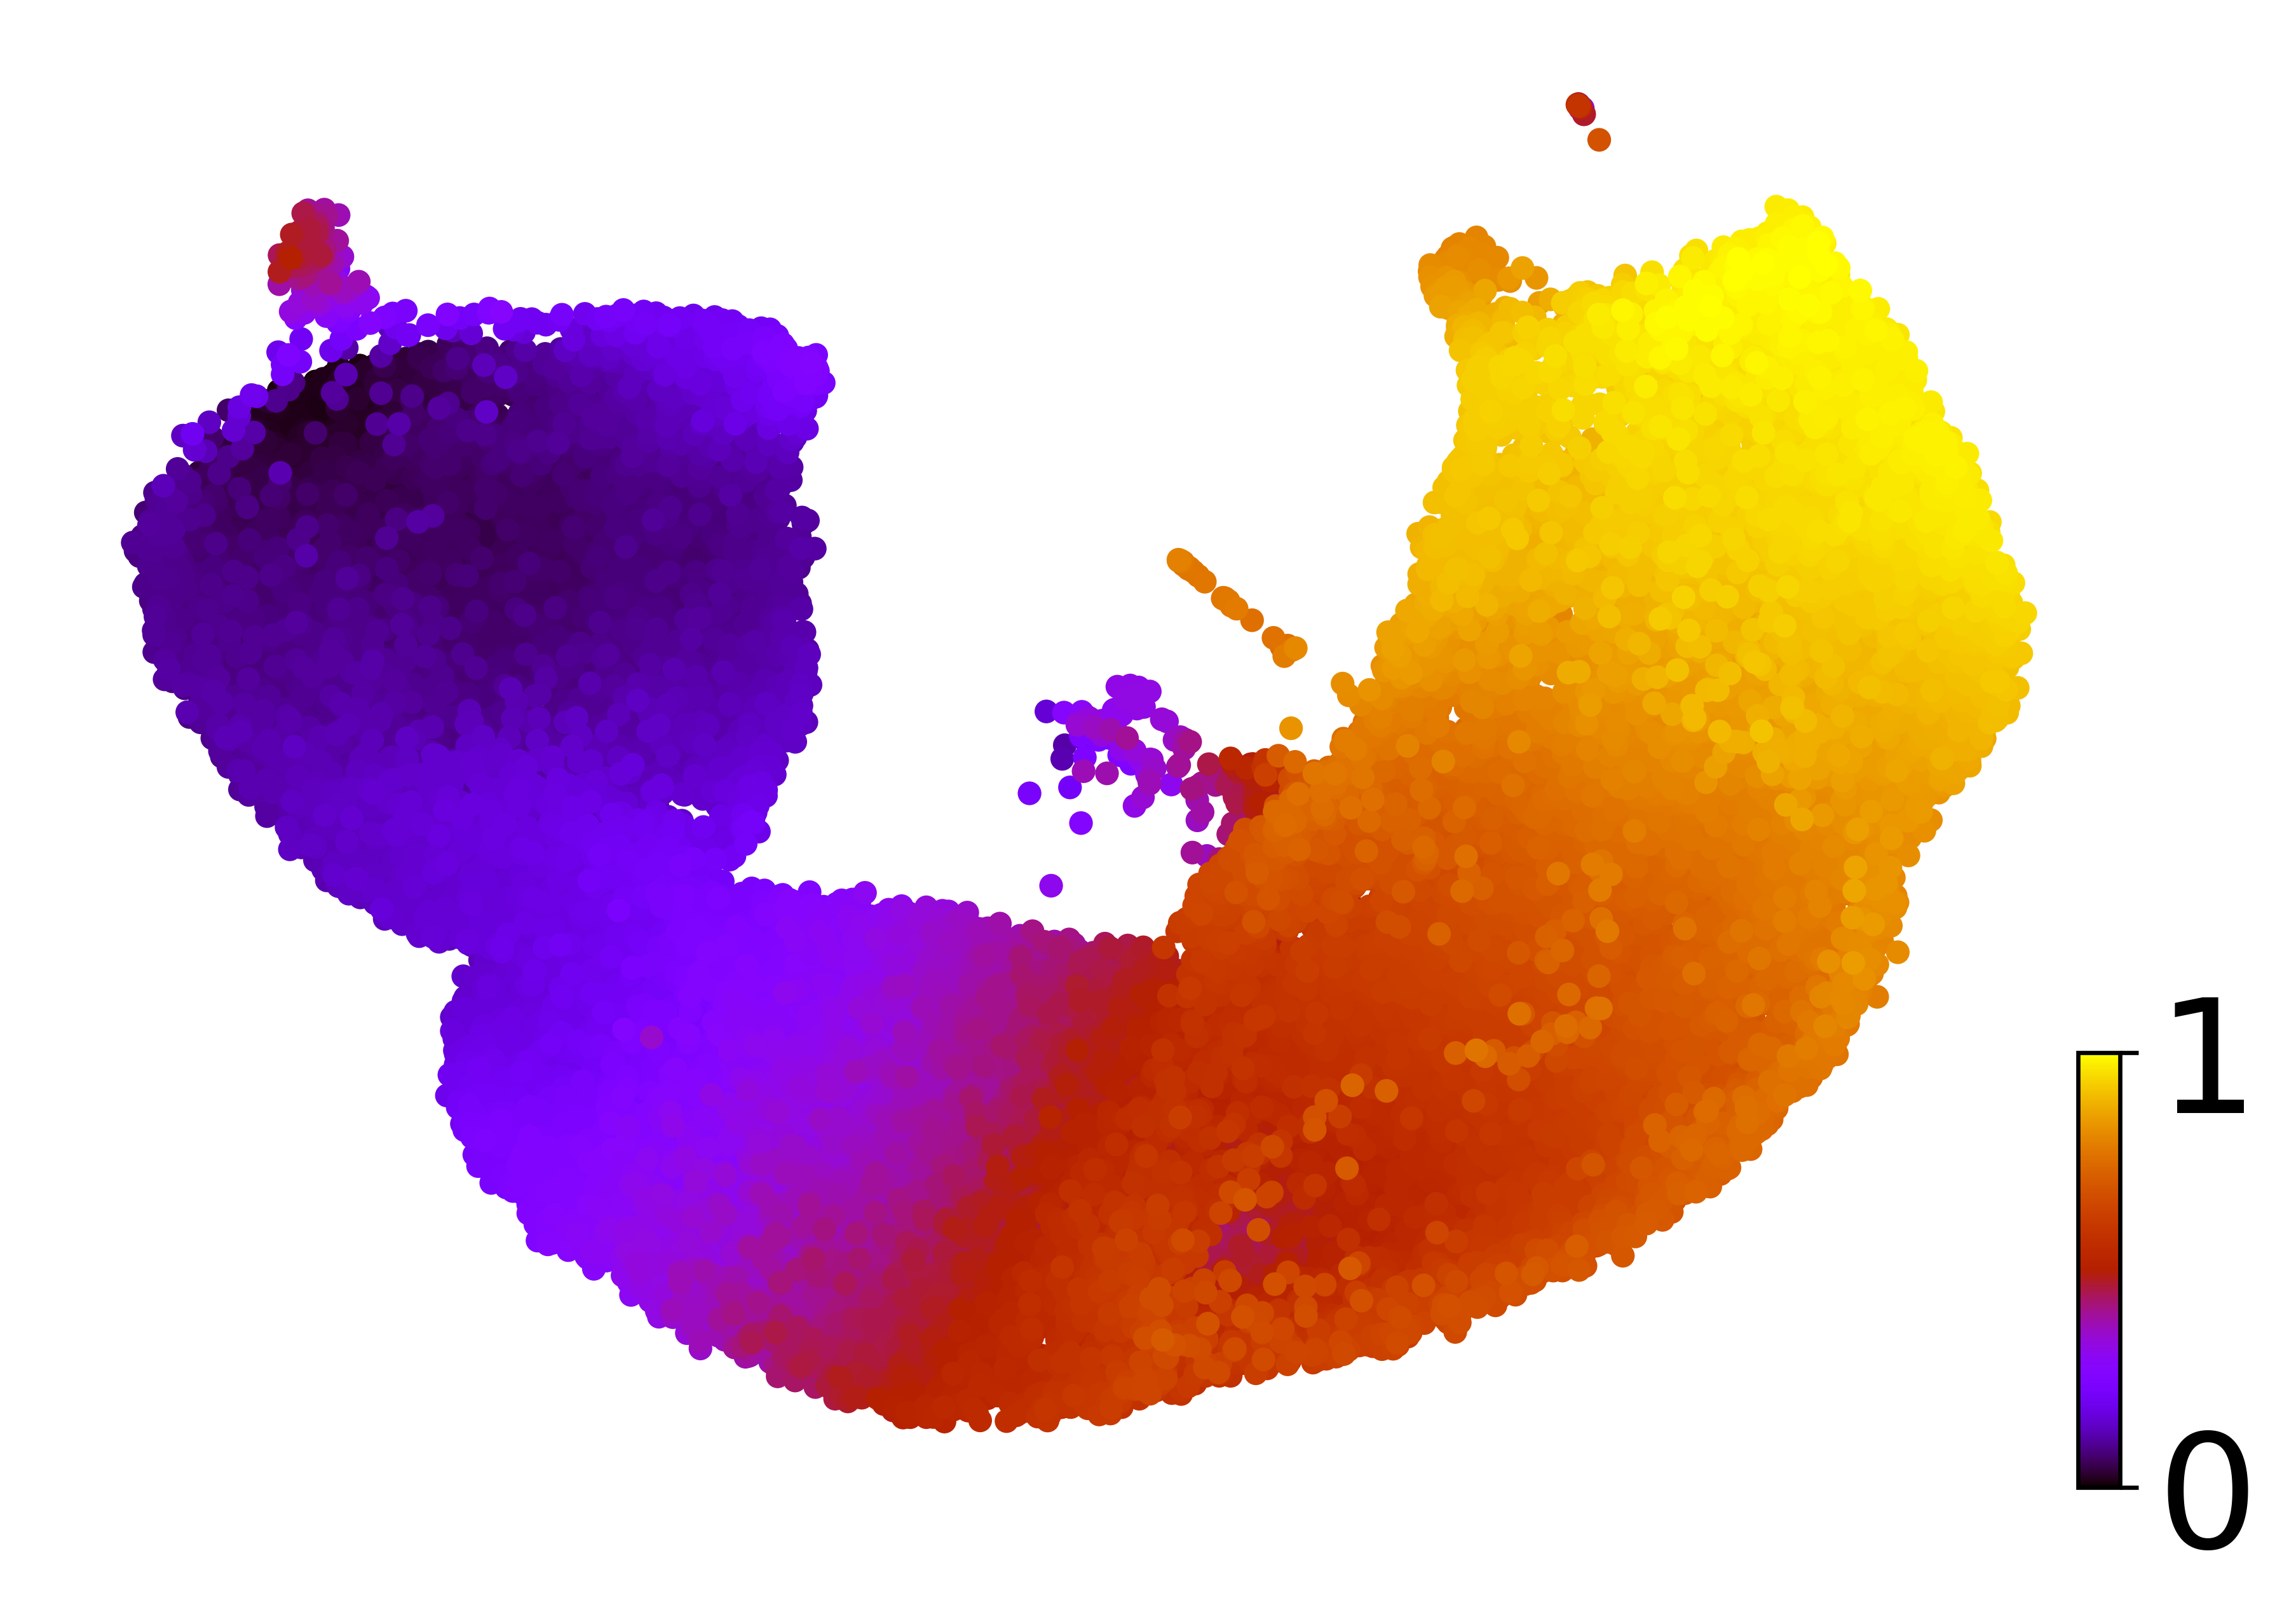

In [9]:
# Plot Figure 6A bottom left corner
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot',size=80,save = '_wrong_latent_time_human.png', colorbar=True,title = '')

Velocities without MURK genes

In [ ]:
# Preprocessing

In [10]:
adata = adata_store.copy()

In [11]:
murk_genes = list(pd.read_csv('murk_genes_human.csv',header=None)[0])

In [12]:
list_no_murk =[gene for gene in adata.var_names if gene not in murk_genes]

In [13]:
adata = adata[:,list_no_murk].copy()

In [14]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata, n_neighbors = 80)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:35) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:12) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [ ]:
# Compute velocities

In [ ]:
scv.tl.recover_dynamics(adata) # This function is very computationally expensive so we run it in the background

In [15]:
adata = scv.read('adata_vel_human_without_MURK.h5')

In [ ]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:18) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
... 97%

In [ ]:
# Plot Figure 6A top right corner
adata.obs['type2'] = adata_store.obs['type2']
scv.pl.velocity_embedding_stream(adata, basis = "umap", color ="type2", size = 50,save = '_right_vel_human.png',legend_loc='right margin',title ='')

In [ ]:
# Plot Figure 6A bottom right corner
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot',size=80, colorbar=True,title = '',save = '_right_latent_time_human.png')